<a href="https://colab.research.google.com/github/MFarisA/Data-Mining/blob/main/gensin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd

file_path = '/content/drive/MyDrive/campuss/data-mining/google-play-rev-gen-2.csv'
# Membaca dataset dengan pengecekan encoding
df = pd.read_csv(file_path)

# Memeriksa beberapa baris pertama
df.head(10)


,id,title,avatar,rating,snippet,likes,date,iso_date,response
0,e5384431-56f9-43fa-a32a-53296afc7f66,Seraphim,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,"While I've reviewed this before, I decided to ...",88,"October 09, 2024",2024-10-09T00:08:20Z,NaN
1,6a73081f-3490-47ba-89fa-83744cb20940,TWOSTORE !,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,Very fun but I wish there was more fighting in...,35,"October 12, 2024",2024-10-12T06:39:01Z,NaN
2,3a3d4c90-0b6e-45dc-b1e6-014659055bbf,A G,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,"Fun game, I enjoy the story. There is tons to ...",11,"October 30, 2024",2024-10-30T18:01:37Z,NaN
3,99015538-1d26-4bd9-a02f-37bc2a361d1a,Astra,https://play-lh.googleusercontent.com/a-/ALV-U...,5.0,This game is phenomenal. The art style and sce...,77,"October 18, 2024",2024-10-18T19:11:12Z,NaN
4,541b3b4d-97f6-42e0-9c68-059a63e1e67f,Angela Williams,https://play-lh.googleusercontent.com/a-/ALV-U...,2.0,"I love this game. However, it is incredibly la...",14,"October 14, 2024",2024-10-14T03:04:43Z,NaN
5,ad484b6a-1b9c-42ab-9cee-9df6e28f12d4,Valerie,https://play-lh.googleusercontent.com/a-/ALV-U...,3.0,I used to be obsessed with this game but I hav...,99,"October 13, 2024",2024-10-13T14:02:08Z,NaN
6,fb25cdf6-40d8-44e8-b1b9-d439ebd88565,Daniel “Chotara” Ricciardi,https://play-lh.googleusercontent.com/a-/ALV-U...,5.0,Highly recommend. I have been playing the game...,65,"October 18, 2024",2024-10-18T15:20:11Z,NaN
7,36e821d3-9441-4eaa-94a7-9c7b9b7463b5,Amy,https://play-lh.googleusercontent.com/a-/ALV-U...,4.0,Hello! I absolutely love this game! It has inc...,29,"October 29, 2024",2024-10-29T00:27:08Z,NaN
8,4b1e6dcb-d251-450e-9be6-358b4bb8e9d6,Feitan Desy,https://play-lh.googleusercontent.com/a-/ALV-U...,4.0,I've been playing this game since January 16th...,64,"October 08, 2024",2024-10-08T23:13:09Z,NaN
9,27525772-1c0a-40e4-8321-4c5f0a0f7c64,Olivia Staringer,https://play-lh.googleusercontent.com/a-/ALV-U...,1.0,"Uninteresting characters, uninteresting dialog...",14,"November 11, 2024",2024-11-11T22:58:07Z,NaN


Labeling Data

In [31]:
# import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

In [ ]:
print(df.columns)


Index(['id', 'title', 'avatar', 'rating', 'snippet', 'likes', 'date',
       'iso_date', 'response'],
      dtype='object')


In [ ]:
#Pembersihan data jika diperlukan
df = df.drop(columns=['Avatar', 'Date'], errors='ignore')

In [33]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    # Ubah teks menjadi lowercase
    text = text.lower()

    # Hapus tanda baca
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenisasi sederhana (TextBlob sudah menangani banyak preprocessing otomatis)
    text_blob = TextBlob(text)

    # Lemmatization
    words = [word.lemmatize() for word in text_blob.words]

    # Gabungkan kembali kata-kata yang sudah diproses
    return ' '.join(words)

In [36]:
import nltk
nltk.download('wordnet')
# Terapkan fungsi pembersihan pada kolom snippet
df['Cleaned_Snippet'] = df['snippet'].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [39]:
# Fungsi untuk memberi label berdasarkan rating
def label_review(rating):
    if rating >= 4:
        return 'Positif'
    elif rating <= 2:
        return 'Negatif'
    else:
        return 'Netral'

# Menambahkan kolom Label berdasarkan Rating
df['Label'] = df['rating'].apply(label_review)

# Cek apakah label sudah berhasil ditambahkan
print(df[['title', 'rating', 'Label']].head(10))

                        title  rating    Label
0                    Seraphim     3.0   Netral
1                  TWOSTORE !     3.0   Netral
2                         A G     3.0   Netral
3                       Astra     5.0  Positif
4             Angela Williams     2.0  Negatif
5                     Valerie     3.0   Netral
6  Daniel “Chotara” Ricciardi     5.0  Positif
7                         Amy     4.0  Positif
8                 Feitan Desy     4.0  Positif
9            Olivia Staringer     1.0  Negatif


In [40]:
# Memisahkan ulasan positif dan negatif
positive_reviews = df[df['Label'] == 'Positif']
negative_reviews = df[df['Label'] == 'Negatif']

In [41]:
# TF-IDF untuk ulasan positif
positive_tfidf = TfidfVectorizer(max_features=20)
positive_features = positive_tfidf.fit_transform(positive_reviews['Cleaned_Snippet']).toarray()
positive_keywords = positive_tfidf.get_feature_names_out()
print("Kata-kata yang sering muncul pada ulasan positif:", positive_keywords)

Kata-kata yang sering muncul pada ulasan positif: ['and' 'are' 'but' 'character' 'for' 'game' 'have' 'in' 'is' 'it' 'like'
 'of' 'so' 'story' 'that' 'the' 'this' 'to' 'with' 'you']


In [42]:
# TF-IDF untuk ulasan negatif
negative_tfidf = TfidfVectorizer(max_features=20)
negative_features = negative_tfidf.fit_transform(negative_reviews['Cleaned_Snippet']).toarray()
negative_keywords = negative_tfidf.get_feature_names_out()
print("Kata-kata yang sering muncul pada ulasan negatif:", negative_keywords)

Kata-kata yang sering muncul pada ulasan negatif: ['and' 'are' 'but' 'character' 'for' 'game' 'have' 'in' 'is' 'it' 'my'
 'not' 'of' 'on' 'story' 'that' 'the' 'this' 'to' 'you']


In [43]:
# Analisis sentimen untuk ulasan positif
positive_reviews['Sentiment'] = positive_reviews['Cleaned_Snippet'].apply(lambda x: TextBlob(x).sentiment.polarity)


<ipython-input-43-711413dec836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['Sentiment'] = positive_reviews['Cleaned_Snippet'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [44]:
# Analisis sentimen untuk ulasan negatif
negative_reviews['Sentiment'] = negative_reviews['Cleaned_Snippet'].apply(lambda x: TextBlob(x).sentiment.polarity)

<ipython-input-44-15f76a809a05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['Sentiment'] = negative_reviews['Cleaned_Snippet'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [45]:
# Rata-rata sentimen
print("Rata-rata sentimen ulasan positif:", positive_reviews['Sentiment'].mean())
print("Rata-rata sentimen ulasan negatif:", negative_reviews['Sentiment'].mean())

Rata-rata sentimen ulasan positif: 0.0921559054736623
Rata-rata sentimen ulasan negatif: -0.062355762698701016


In [47]:
#  Membuat WordCloud untuk ulasan positif
positive_text = ' '.join(positive_reviews['Cleaned_Snippet'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

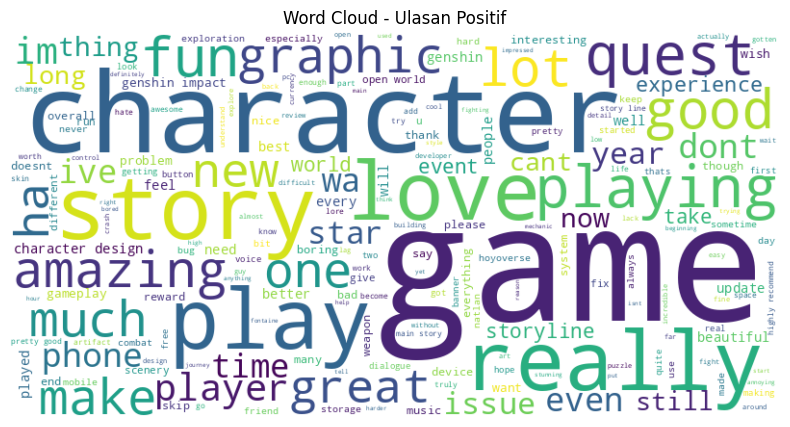

In [48]:
# Tampilkan WordCloud untuk ulasan positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ulasan Positif')
plt.show()

In [49]:
# Membuat WordCloud untuk ulasan negatif
negative_text = ' '.join(negative_reviews['Cleaned_Snippet'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

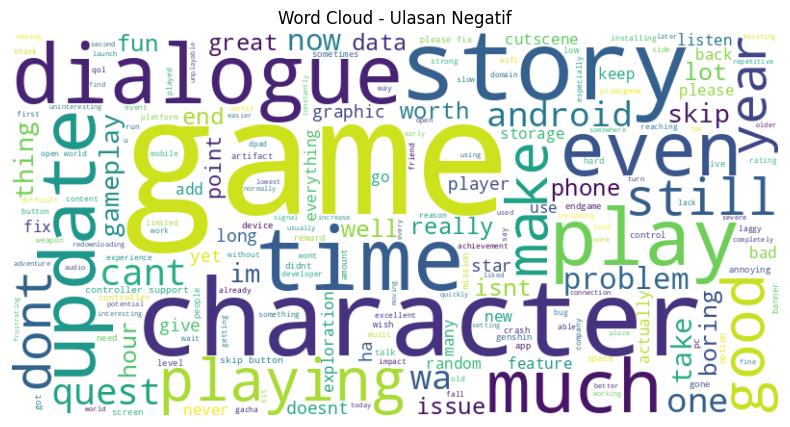

In [50]:
# Tampilkan WordCloud untuk ulasan negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ulasan Negatif')
plt.show()